In [18]:
import numpy as np
import matplotlib.pyplot as plt
from libs.utils import EXPERIMENT
EX = EXPERIMENT('window',2,'open',40)
EX.get_DTpv()
EX.correct_positions()

Material: window Aperture: open Power: 40
	I0 = 0.31830988618379064
Peak: 1.0006162079510537
Valley: 0.991813373130969
Position of the focal plane: 157.60050251256283
Rayleigh range: 68.20869051138044


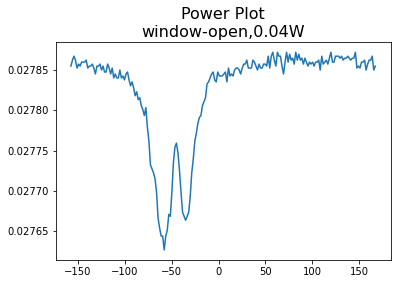

In [19]:
EX.plot_power()

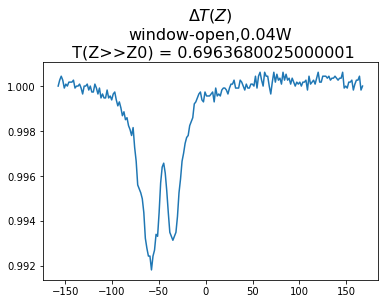

In [20]:
EX.plot_normalized_trasmittance()